In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\data_science_udemy\DATA\economic_index.csv")

In [9]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
#drop the unnessory columns
df.drop(columns=['Unnamed: 0', "year","month"],axis = 1, inplace=True)


In [12]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

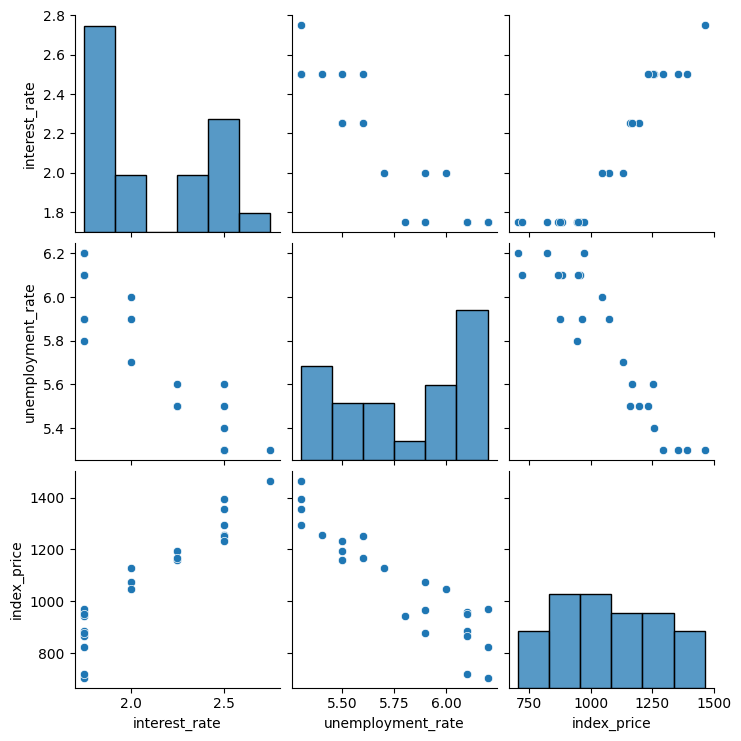

In [13]:
#do some visualization
sns.pairplot(df)

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'Interest Rate vs Unemployment Rate')

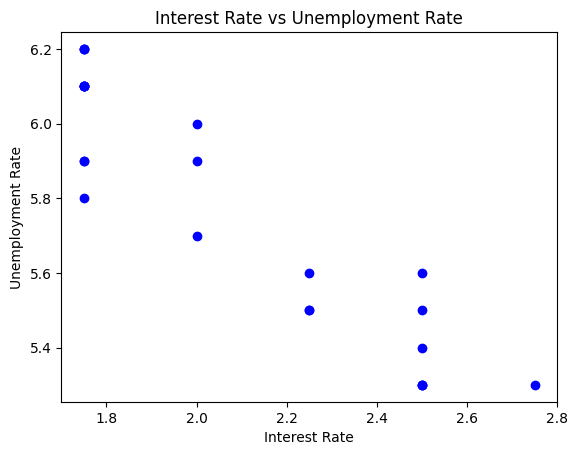

In [19]:
#visualizing the datapoints more closly
plt.scatter(df['interest_rate'],df['unemployment_rate'], color='blue')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')


Text(0, 0.5, 'Index Price')

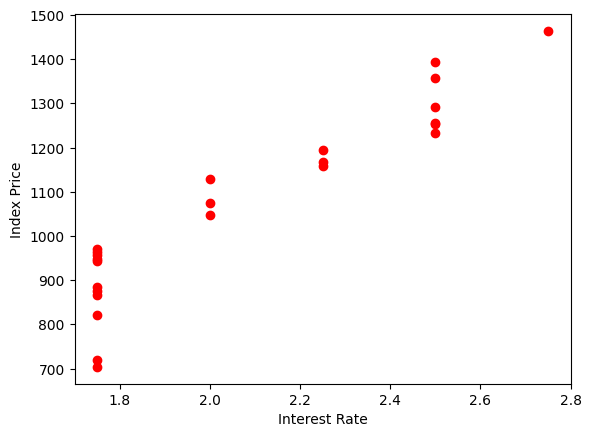

In [20]:
plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')   

In [21]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
# Validate the model using cross-validation
from sklearn.model_selection import cross_val_score
validator = cross_val_score(estimator=regressor, X=x_train, y=y_train  , cv=3)

In [31]:
np.mean(validator)

0.8541426890278224

Text(0.5, 1.0, 'Actual vs Predicted Values')

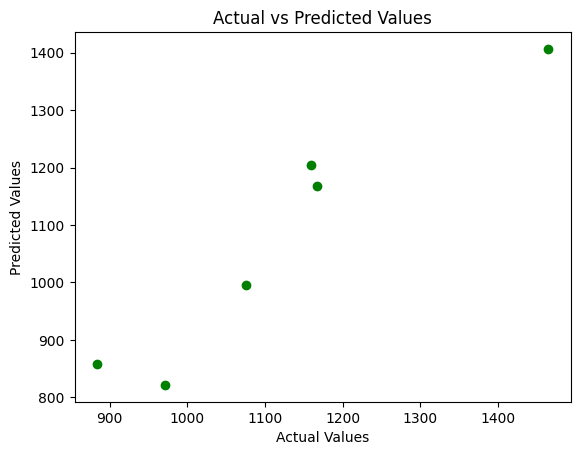

In [35]:
#prediction
y_pred = regressor.predict(x_test)

plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

Text(0.5, 1.0, 'Residuals Distribution')

<Figure size 1000x600 with 0 Axes>

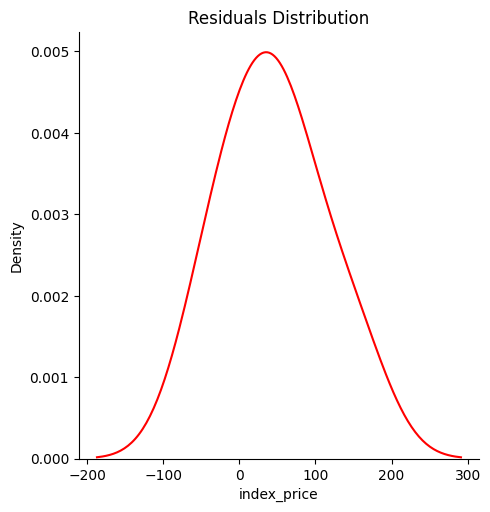

In [38]:
#if the output obtained by plot is a normal curve that means our model is perfectly fitted
plt.figure(figsize=(10,6))
residuals = y_test - y_pred
sns.displot(residuals,kind = 'kde',color = 'red')
plt.title('Residuals Distribution')